# CB Runs - Analysis

I previously generated 105 runs of the CBR only War and Reason model from EUGene data, using a 16-core AWS server (with 120GB of RAM, because good decisions). Now I'm going to analyze them.

In [1]:
import pickle

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [2]:
all_data = []
for i in range(105):
    filename = "data_out/ex2_1_{}.pickle".format(i)
    zip_file = filename + ".tar.bz2"
    !tar -jxvf $zip_file 
    df = pd.read_pickle(filename)
    df["Iteration"] = i
    df["Outcome_sub"] = df.Outcome.str.slice(0, 3)
    df["Model_Outcome_sub"] = df.Model_Outcome.str.slice(0, 3)
    df["Model_Correct"] = 0
    df.loc[(df.Outcome_sub==df.Model_Outcome_sub), "Model_Correct"] = 1
    
    all_data.append(df)
    !rm $filename

x data_out/ex2_1_0.pickle
x data_out/ex2_1_1.pickle
x data_out/ex2_1_2.pickle
x data_out/ex2_1_3.pickle
x data_out/ex2_1_4.pickle
x data_out/ex2_1_5.pickle
x data_out/ex2_1_6.pickle
x data_out/ex2_1_7.pickle
x data_out/ex2_1_8.pickle
x data_out/ex2_1_9.pickle
x data_out/ex2_1_10.pickle
x data_out/ex2_1_11.pickle
x data_out/ex2_1_12.pickle
x data_out/ex2_1_13.pickle
x data_out/ex2_1_14.pickle
x data_out/ex2_1_15.pickle
x data_out/ex2_1_16.pickle
x data_out/ex2_1_17.pickle
x data_out/ex2_1_18.pickle
x data_out/ex2_1_19.pickle
x data_out/ex2_1_20.pickle
x data_out/ex2_1_21.pickle
x data_out/ex2_1_22.pickle
x data_out/ex2_1_23.pickle
x data_out/ex2_1_24.pickle
x data_out/ex2_1_25.pickle
x data_out/ex2_1_26.pickle
x data_out/ex2_1_27.pickle
x data_out/ex2_1_28.pickle
x data_out/ex2_1_29.pickle
x data_out/ex2_1_30.pickle
x data_out/ex2_1_31.pickle
x data_out/ex2_1_32.pickle
x data_out/ex2_1_33.pickle
x data_out/ex2_1_34.pickle
x data_out/ex2_1_35.pickle
x data_out/ex2_1_36.pickle
x data_out/

In [3]:
data = pd.concat(all_data)

In [4]:
data.head()

,year,ccode1,ccode2,Equilibrium,Outcome,Model_Outcome,Move_Quality,Iteration,Outcome_sub,Model_Outcome_sub,Model_Correct
0,1816,2,200,eqTacqa,StatusQuo,Acquiesce_B,0.0,0,Sta,Acq,0
1,1816,2,210,eqTacqa,StatusQuo,Acquiesce_B,0.0,0,Sta,Acq,0
2,1816,2,220,eqTacqa,StatusQuo,Acquiesce_B,0.0,0,Sta,Acq,0
3,1816,2,225,eqTacqa,StatusQuo,Acquiesce_B,0.0,0,Sta,Acq,0
4,1816,2,230,eqTacqa,Capitulate_B,Capitulate_A2,0.4,0,Cap,Cap,1


In [5]:
len(data)

107907660

In [6]:
all_data = None

## Visualize fraction of equilibrium outcomes

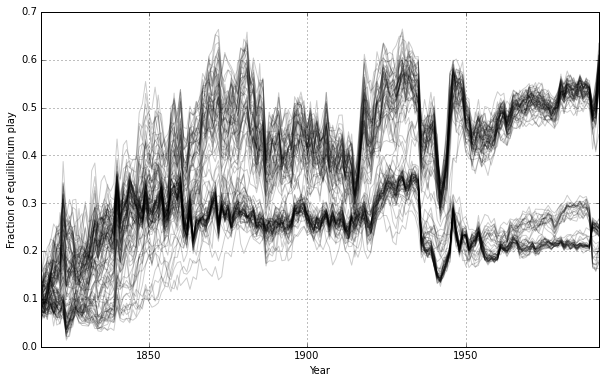

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year").aggregate(lambda x: len(x[x.Move_Quality==1])/len(x))["ccode1"]
    #ax.plot(s, c='k', alpha=0.2)
    s.plot(c='k', alpha=0.2)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)

## Visualize fraction of historically-correct outcomes

In [8]:
data.Outcome.unique()

array(['StatusQuo', 'Capitulate_B', 'Capitulate_A', 'Negotiation',
       'Acquiesce_B', 'War', 'Acquiesce_A'], dtype=object)

In [7]:
data.Model_Correct.mean()

0.072777020648951155

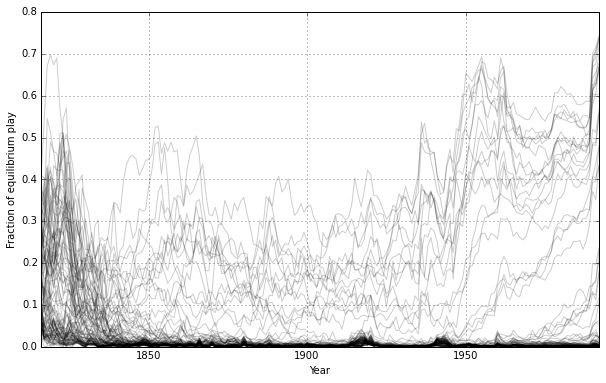

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    s = group.groupby("year")["Model_Correct"].aggregate("mean")
    s.plot(c='k', alpha=0.2, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)

In [7]:
final_rate = data[data.year==data.year.max()].groupby("Iteration")["Model_Correct"]\
                .aggregate("mean")

In [8]:
#better_than = len(final_rate[final_rate>(1/13)])
better_than = len(final_rate[final_rate>0.5])
print(better_than)
print(better_than / len(final_rate))

15
0.14285714285714285


In [9]:
final_rate[final_rate>0.5]

Iteration
4      0.677655
5      0.669859
7      0.555126
21     0.567188
23     0.667311
28     0.668293
34     0.698926
50     0.555924
53     0.604297
57     0.659116
60     0.739595
63     0.729926
65     0.743984
79     0.737385
101    0.716820
Name: Model_Correct, dtype: float64

In [11]:
best_iters = final_rate[final_rate>0.5].index

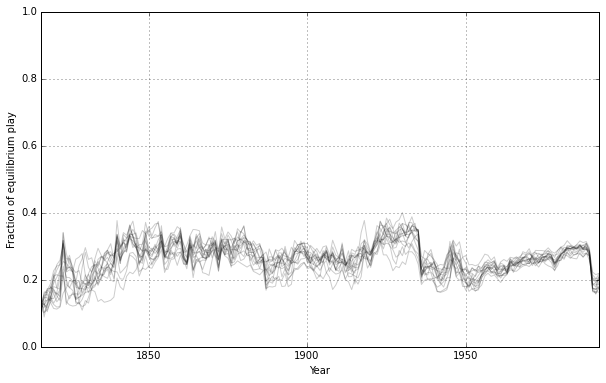

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

for iteration, group in data.groupby("Iteration"):
    if iteration not in best_iters:
        continue
    s = group.groupby("year").aggregate(lambda x: len(x[x.Move_Quality==1])/len(x))["ccode1"]
    #ax.plot(s, c='k', alpha=0.2)
    s.plot(c='k', alpha=0.2)
ax.set_xlabel("Year")
ax.set_ylim(0, 1)
ax.set_ylabel("Fraction of equilibrium play")
ax.grid(True)

# Regressions

In [ ]:
observed_outcomes = pd.get_dummies(data.Outcome)
rl_predictions = pd.get_dummies(data.Model_Outcome)
rl_predictions["Const."] = 1
regressors = [col for col in rl_predictions.columns if col != "StatusQuo"]

In [ ]:
observed_outcomes.columns

In [ ]:
logit_1 = sm.Logit(observed_outcomes.War, rl_predictions[regressors]).fit()

# Regressions - subset of best models only

In [13]:
subset = data[data.Iteration.isin(best_iters)]

In [14]:
observed_outcomes = pd.get_dummies(subset.Outcome)
rl_predictions = pd.get_dummies(subset.Model_Outcome)
rl_predictions["Const."] = 1
regressors = [col for col in rl_predictions.columns if col != "StatusQuo"]

In [ ]:
logits = {}
for col in observed_outcomes:
    logits[col] = sm.Logit(observed_outcomes[col], rl_predictions[regressors]).fit()

Optimization terminated successfully.
         Current function value: 0.004488
         Iterations 13
Optimization terminated successfully.